In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns

In [2]:
df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## Instructions
 - Get the numerical variables from our dataset.
 - Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
 - Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

 - Get the numerical variables from our dataset

In [12]:
numericals = df.select_dtypes(np.number)

In [13]:
numericals.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


 - Check using a distribution plot if the variables fit the theoretical normal or exponential distribution

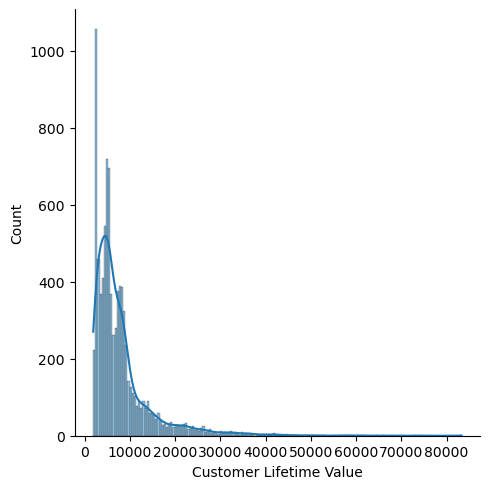

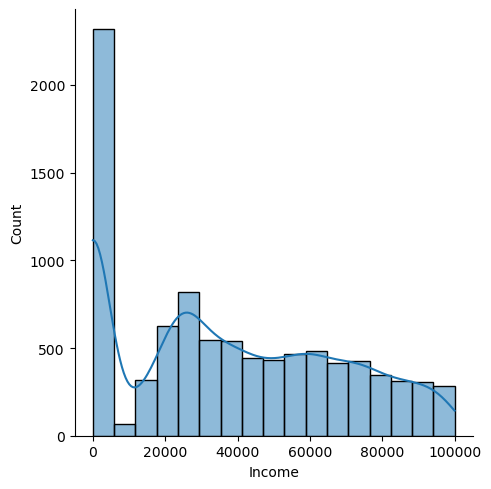

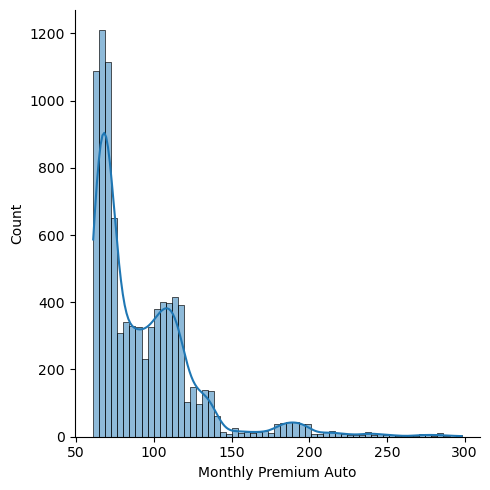

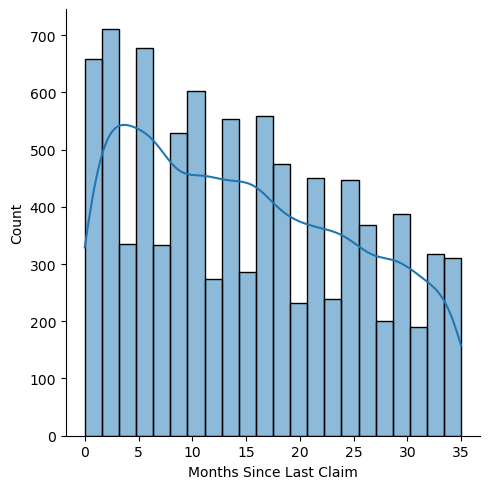

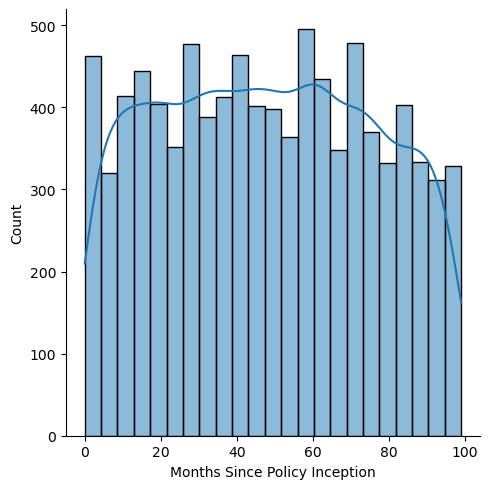

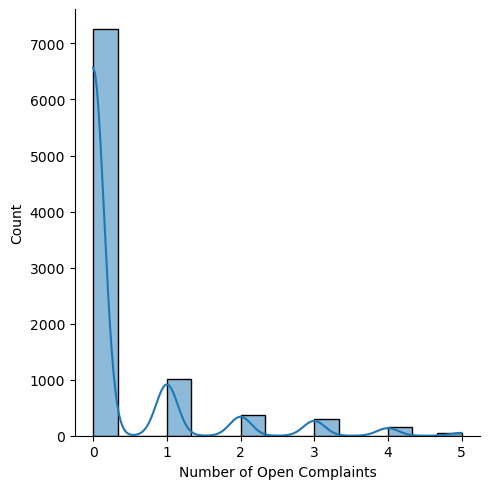

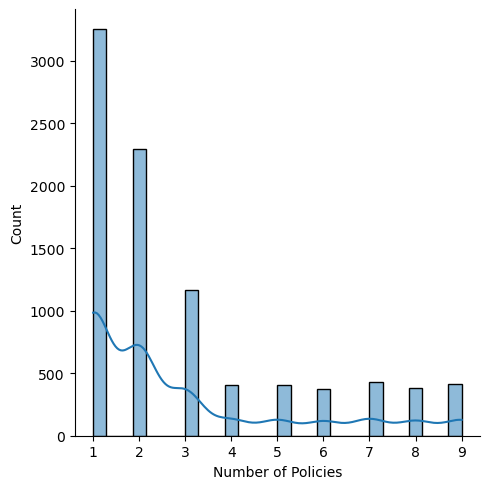

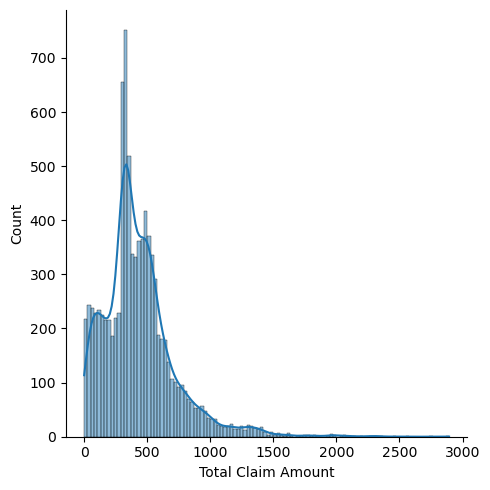

In [15]:
for col in numericals.columns:
    sns.displot(numericals[col], kde = True)
    plt.show() 

1. Customer Lifetime Value, Income, Monthly premium autom Months since last claim and Total Claim amount do not follow a normal or exponential distribution. 
2. Months Since Policy Inception has a normal distribution.
3. For number of Open Complaints and number of policies, I'm not sure

 - Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result

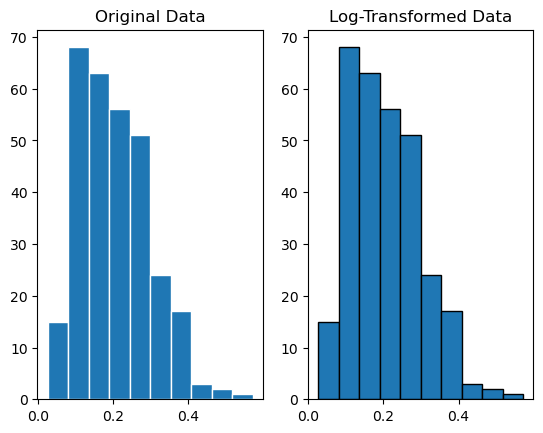

In [30]:
#log trandformation
numericals = np.random.beta(a=4, b=15, size=300)

#create log-transformed data
log = np.log(numericals)

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(numericals, edgecolor='white')
axs[1].hist(numericals, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Log-Transformed Data')

plt.show()

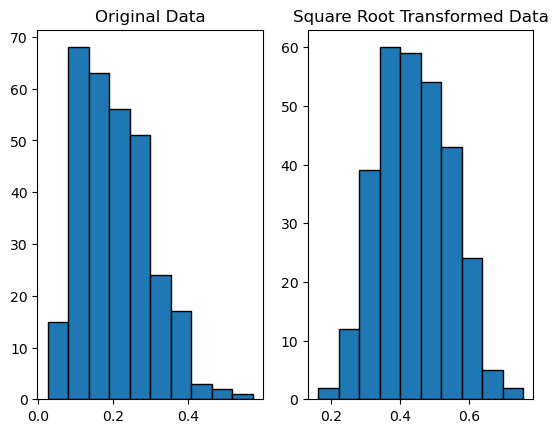

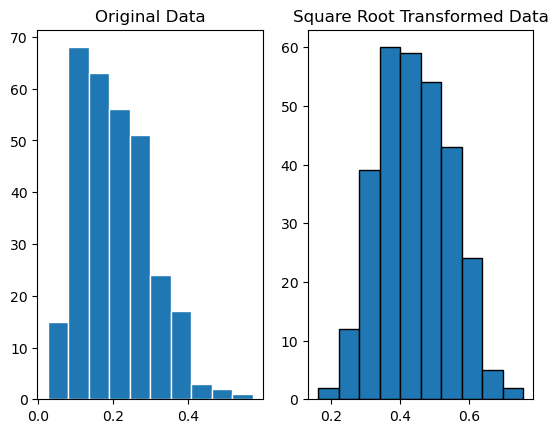

In [32]:
#create log-transformed data
data_log = np.sqrt(numericals)

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(numericals, edgecolor='white')
axs[1].hist(data_log, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Square Root Transformed Data')

plt.show()

C:\Users\Gladys\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


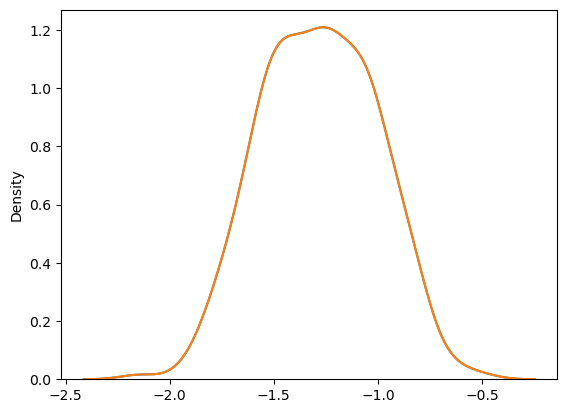

In [35]:
#perform Box-Cox transformation on original data

from scipy.stats import boxcox 

transformed_data, best_lambda = boxcox(numericals) 

#plot the distribution of the transformed data values
sns.distplot(transformed_data, hist=False, kde=True) 

plt.show()

Box cox was better